<a href="https://colab.research.google.com/github/Armos05/Medical-Image-Filters/blob/main/Auto_Encoders_MNIST_image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries


In [ ]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


## Extra

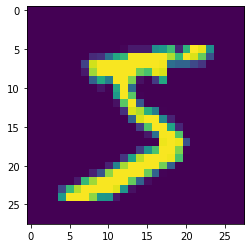

In [ ]:
x_train.shape
image = x_train[0].reshape(28,28)
image = image*255
#plt.imshow(image, cmap= 'binary')
plt.imshow(image)

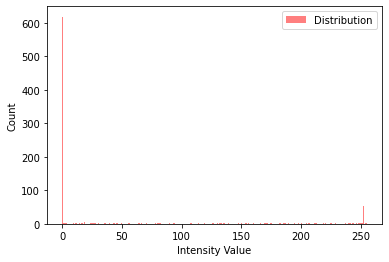

In [ ]:
plt.hist(image[:, :].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Distribution'])
plt.show()

In [ ]:
## Adding Salt and Pepper Noise

import random

def sp_noise(image,prob):

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 1
            else:
                output[i][j] = image[i][j]
    return output



(28, 28)

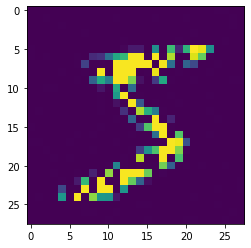

In [ ]:
sp_2 = sp_noise(image, 0.15)
plt.imshow(sp_2)
sp_2.shape

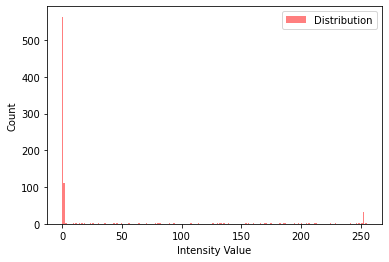

In [ ]:
plt.hist(sp_2[:, :].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Distribution'])
plt.show()

0.0

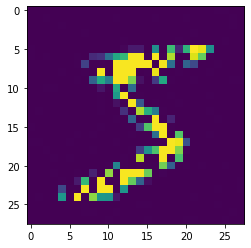

In [ ]:
sp = sp_2/255
plt.imshow(sp)
sp[0][1]

## Task 3: Adding Noise


In [ ]:
x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

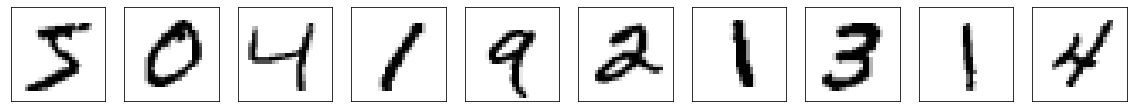

In [ ]:
def plot(x, p, labels = False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return
plot(x_train, None)

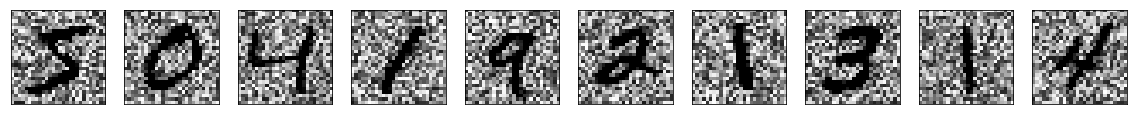

In [ ]:
plot(x_train_noisy, None)

## Task 4: Building and Training a Classifier


In [ ]:
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
118/118 [==============================] - 3s 18ms/step - loss: 0.4145 - accuracy: 0.8874
Epoch 2/3
118/118 [==============================] - 2s 17ms/step - loss: 0.1537 - accuracy: 0.9551
Epoch 3/3
118/118 [==============================] - 2s 18ms/step - loss: 0.1062 - accuracy: 0.9689


In [ ]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9692
0.9692000150680542


In [ ]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

313/313 [==============================] - 0s 2ms/step - loss: 8.0216 - accuracy: 0.1896
0.18960000574588776


## Task 5: Building the Autoencoder


In [ ]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

## Task 6: Training the Autoencoder


In [ ]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print('Training is complete!')

0.257 _ 0.218 _ 0.194 _ 0.176 _ 0.163 _ 0.154 _ 0.147 _ 0.141 _ 0.136 _ 0.132 _ 0.129 _ 0.126 _ 0.123 _ 0.121 _ 0.119 _ 0.117 _ 0.116 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.102 _ 0.102 _ 0.103 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _  _ 
Training is complete!


## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [ ]:
x_test_noisy.shape

(10000, 784)

In [ ]:
preds = autoencoder.predict(x_test_noisy)

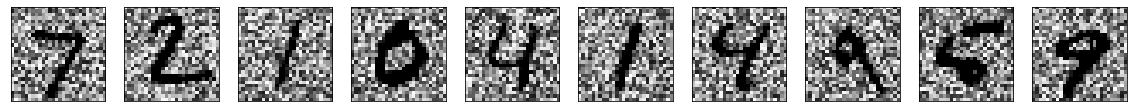

In [ ]:
plot(x_test_noisy, None)

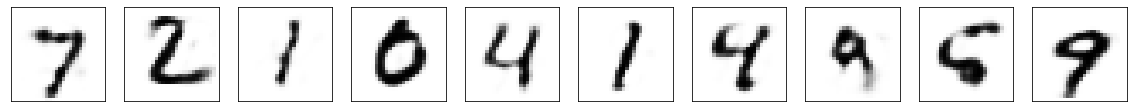

In [ ]:
plot(preds, None)

In [ ]:
loss, acc = classifier.evaluate(preds, y_test)
print(acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9485
0.9484999775886536


## Testing

In [ ]:
from google.colab import files
t_image = files.upload()

Saving Test.png to Test.png


(1, 784)


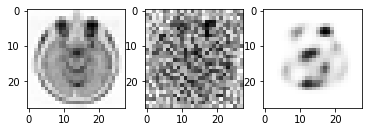

In [ ]:
import cv2

image = cv2.imread('Test.png',0)
image = image/255
image = image.reshape(1,784)
noisy_image = image + np.random.rand(1, 784) * 0.9

preds_try = autoencoder.predict(noisy_image)
#plot(new_img,None)
#plot(preds_try,None)
print(preds_try.shape)
plt.subplot(1,3,1)
plt.imshow(image.reshape(28,28), cmap='binary')
plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap='binary')
plt.subplot(1,3,3)
plt.imshow(preds_try.reshape(28,28), cmap='binary')

(1, 784)


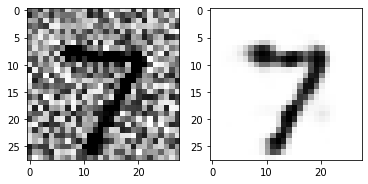

In [ ]:
new_img = x_test_noisy[0:1]
new_img.shape

preds_try = autoencoder.predict(new_img)
#plot(new_img,None)
#plot(preds_try,None)
print(preds_try.shape)
plt.subplot(1,2,1)
plt.imshow(new_img.reshape(28,28), cmap='binary')
plt.subplot(1,2,2)
plt.imshow(preds_try.reshape(28,28), cmap='binary')


## Task 8: Composite Model


In [ ]:
noisy_image = Input(shape=(784,))
x = autoencoder(noisy_image)
y = classifier(x)

denoise_and_classify = Model(noisy_image, y)

In [ ]:
p = denoise_and_classify.predict(x_test_noisy)

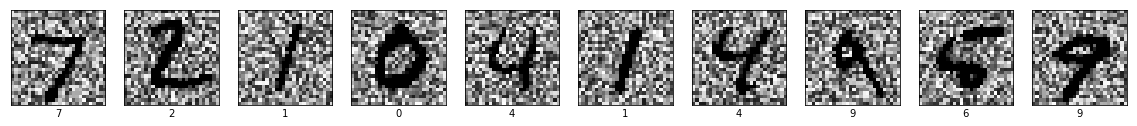

In [ ]:
plot(x_test_noisy, p, True)

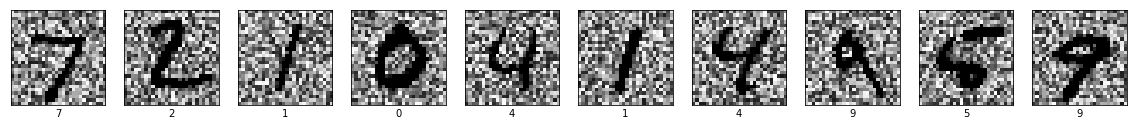

In [ ]:
plot(x_test_noisy, to_categorical(y_test), True)